# K47_T1_001_rawClover_crystal_02.txt

In [2]:
using Plots, DelimitedFiles,LsqFit

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

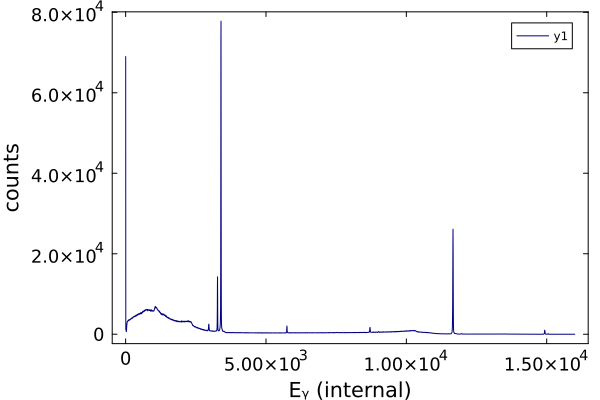

In [3]:
crystal2raw=readdlm("data/K47_T1_001_rawClover_crystal_02.txt",',')

plot(crystal2raw[:,1],crystal2raw[:,2])

## Identified Peaks

In [4]:
xlow,xhigh = 3200,3300
param = [100,0.05,2e5,3250,5]

5-element Vector{Float64}:
    100.0
      0.05
 200000.0
   3250.0
      5.0

### Peak 1 [3225,3325]

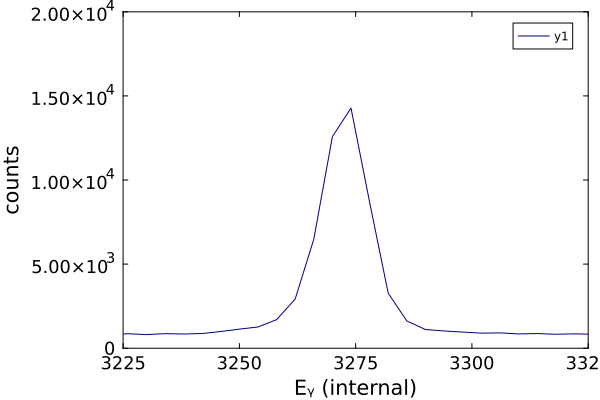

In [5]:
plot(crystal2raw[:,1],crystal2raw[:,2],xlims=(3225,3325),ylims=(0,2.0e4))

`param = [background-constant, background-slope, area1,mean1,sigma1]`

P1 = 3986.31170896515(4964.046030139096)
P2 = -0.9171838860619248(1.51589706658308)
P3 = 171730.83340016176(2643.3400524420013)
P4 = 3272.681877353408(0.07747465206065672)
P5 = 5.074780390404801(0.08166452218386988)


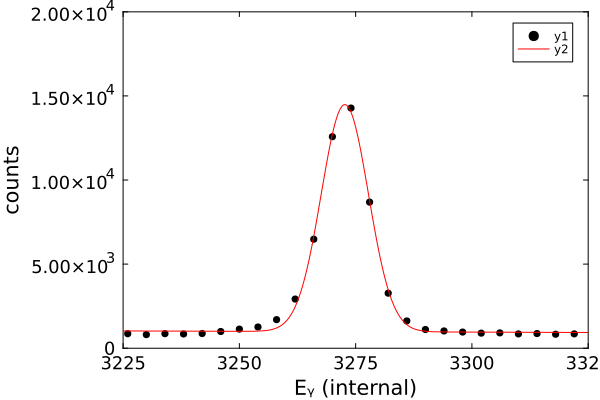

In [6]:
x2low,x2high = 3225,3325
peak2_mean = 3270
param2 = [100,0.05,2e5,peak2_mean,5]

p564,s564,f=PhotopeakFit.gaussianfit(crystal2raw,x2low,x2high,param2)

for (i,val) in enumerate(p564)
    println("P$i = ",val,"($(s564[i]))")
end

scatter(crystal2raw[:,1],crystal2raw[:,2],xlims=(x2low,x2high),ylims=(0,2e4))
plot!(e->f(e,p564),x2low,x2high,lc=:red)

### Peak 3 [3355,3440]

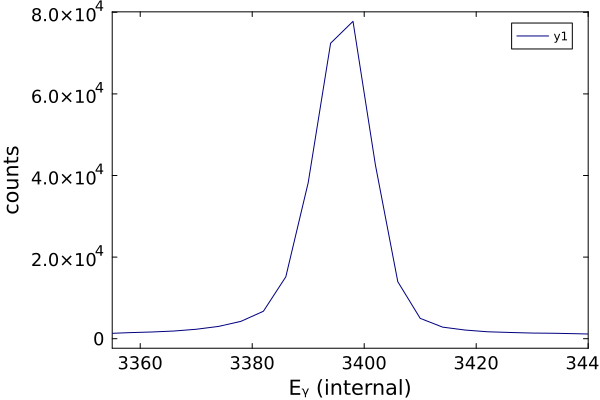

In [7]:
plot(crystal2raw[:,1],crystal2raw[:,2],xlims=(3355,3440))

P1 = 61501.0103342436(37074.820344938955)
P2 = -17.420747651744584(10.89858433703596)
P3 = 999298.7879886389(16098.756212032042)
P4 = 3396.2499430255257(0.079128801137561)
P5 = 5.095479413582658(0.08426144113165783)


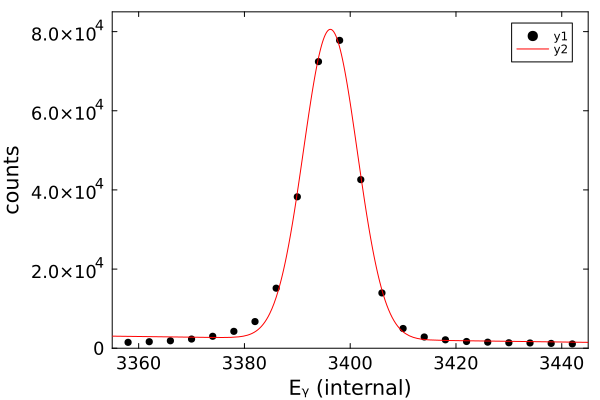

In [8]:
x3low,x3high = 3355,3445
peak3_mean = 3395
param3 = [100,0.05,2e5,peak3_mean,5]

p586,s586,f=PhotopeakFit.gaussianfit(crystal2raw,x3low,x3high,param3)

for (i,val) in enumerate(p586)
    println("P$i = ",val,"($(s586[i]))")
end

scatter(crystal2raw[:,1],crystal2raw[:,2],xlims=(x3low,x3high),ylims=(0,8.5e4))
plot!(e->f(e,p586),x3low,x3high,lc=:red)

### Peak 4 [1.15e4,1.182e4]

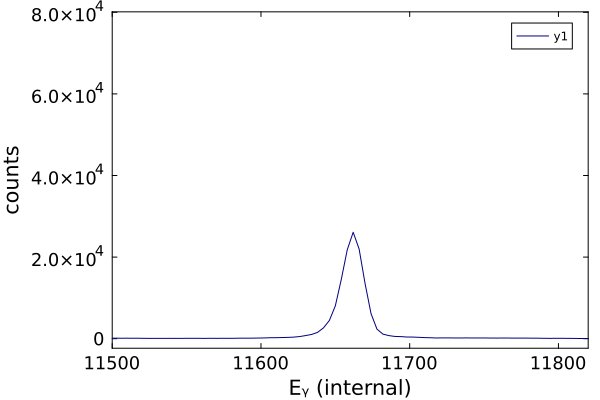

In [9]:
plot(crystal2raw[:,1],crystal2raw[:,2],xlims=(1.15e4,1.182e4))

P1 = 27214.23458542767(34027.10146037768)
P2 = -2.287049158110641(2.918461533043309)
P3 = 462123.03177708946(8393.433871506084)
P4 = 11661.666727467906(0.1286090114572029)
P5 = 7.411442499382519(0.13732581370280694)


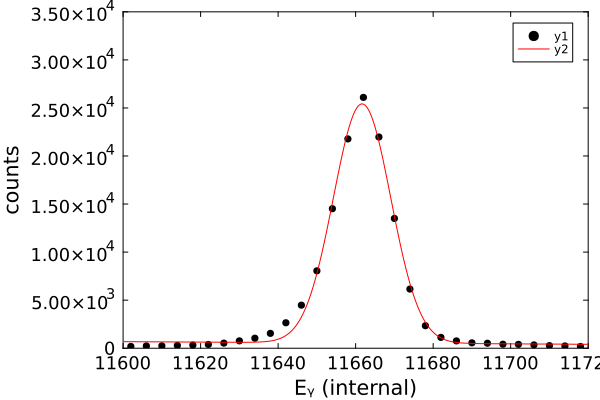

In [10]:
x4low,x4high = 1.16e4,1.172e4
peak4_mean = 1.165e4
param4 = [100,0.05,2e5,peak4_mean,5]

p2013,s2013,f=PhotopeakFit.gaussianfit(crystal2raw,x4low,x4high,param4)

for (i,val) in enumerate(p2013)
    println("P$i = ",val,"($(s2013[i]))")
end

scatter(crystal2raw[:,1],crystal2raw[:,2],xlims=(x4low,x4high),ylims=(0,3.5e4))
plot!(e->f(e,p2013),x4low,x4high,lc=:red)

## Energy Calibration

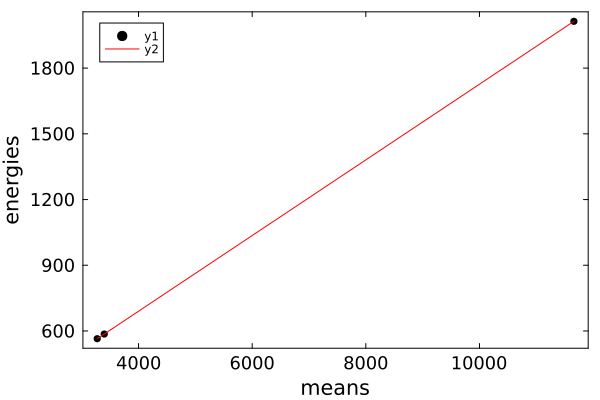

In [11]:
energies = [564.79,586.01,2013.45]; means=[p564[4],p586[4],p2013[4]]

scatter(means,energies,xlabel="means",ylabel="energies")

@. linearfit(e,p)=p[1]+p[2]*e

fitcrystal2=curve_fit(linearfit,means,energies,[500,0.15])

scatter(means,energies,xlabel="means",ylabel="energies")
plot!(e->linearfit(e,fitcrystal2.param),lc=:red)

### Residuals

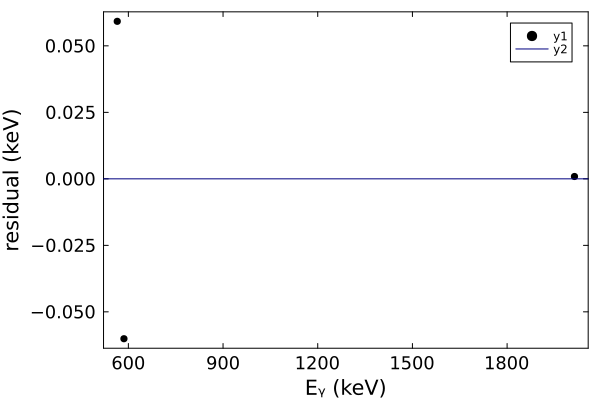

In [12]:
residuals = energies .- ( fitcrystal2.param[1] .+ means .* fitcrystal2.param[2] )

scatter(energies,residuals,xlabel="Eᵧ (keV)",ylabel="residual (keV)")
hline!([0])

### Calibrated Histogram

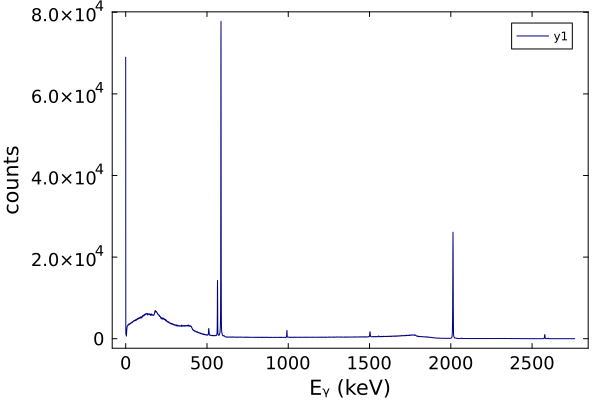

In [13]:
crystal2calibrated = [ fitcrystal2.param[1].+crystal2raw[:,1].*fitcrystal2.param[2] crystal2raw[:,2] ] 

plot(crystal2calibrated[:,1],crystal2calibrated[:,2],xlabel="Eᵧ (keV)")

# K47_T1_001_rawClover_crystal_03.txt

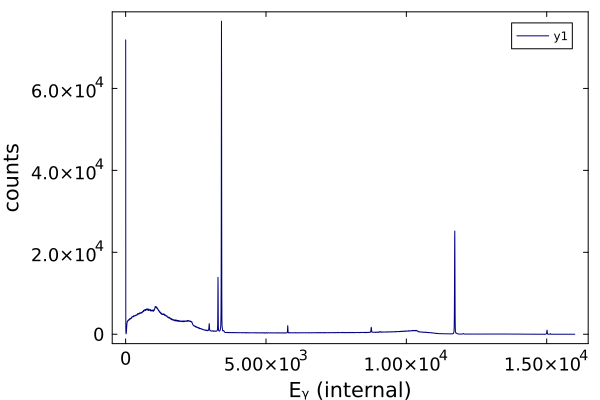

In [15]:
crystal3raw=readdlm("data/K47_T1_001_rawClover_crystal_03.txt",',')

plot(crystal3raw[:,1],crystal3raw[:,2])

## Identified Peaks

### Peak 1 [3250,3330]

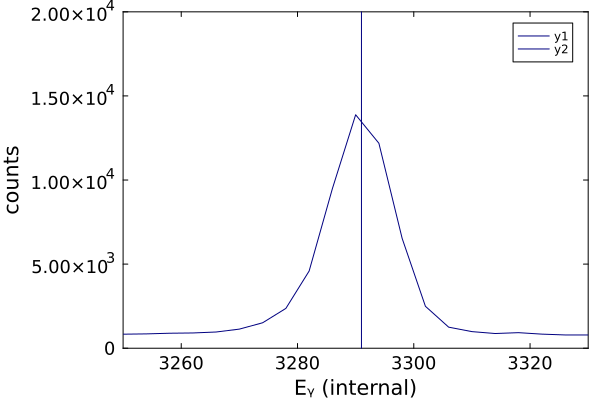

In [23]:
plot(crystal3raw[:,1],crystal3raw[:,2],xlims=(3250,3330),ylims=(0,2.0e4))
vline!([3291])

`param = [background-constant, background-slope, area1,mean1,sigma1]`

P1 = 10067.510103795608(7633.630783954515)
P2 = -2.762967029051186(2.3205684668477846)
P3 = 179613.50805618198(3012.2676868535955)
P4 = 3290.8957513215646(0.08504660343413135)
P5 = 5.514704983981359(0.09201202332798045)


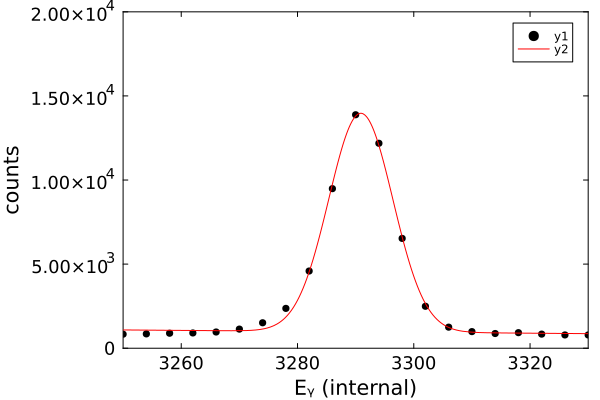

In [41]:
c03_x1low,c03_x1high = 3250,3330
c03_peak1_mean = 3291
c03_param1 = [100,0.05,2e5,c03_peak1_mean,5]

c03_p564,c03_s564,f=PhotopeakFit.gaussianfit(crystal3raw,c03_x1low,c03_x1high,c03_param1)

for (i,val) in enumerate(c03_p564)
    println("P$i = ",val,"($(c03_s564[i]))")
end

scatter(crystal3raw[:,1],crystal3raw[:,2],xlims=(c03_x1low,c03_x1high),ylims=(0,2e4))
plot!(e->f(e,c03_p564),c03_x1low,c03_x1high,lc=:red)
#vline!([3290.89575])

### Peak 2 [3365,3465]

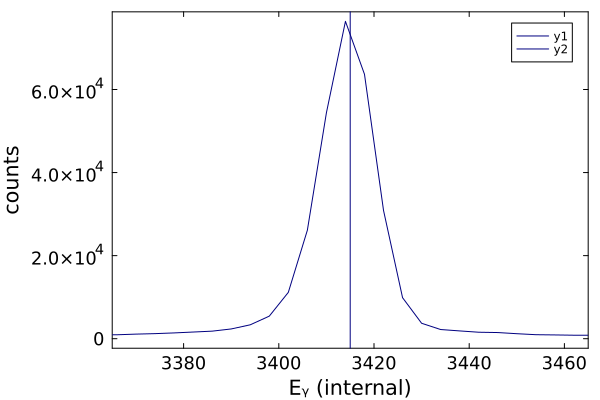

In [42]:
plot(crystal3raw[:,1],crystal3raw[:,2],xlims=(3365,3465))
vline!([3415])

P1 = 28328.946659667417(28177.129458080446)
P2 = -7.777858813232868(8.253457251839183)
P3 = 1.0487583328710692e6(15455.802498867179)
P4 = 3414.4494437253543(0.08088595578324878)
P5 = 5.636848815334029(0.08580282310933503)


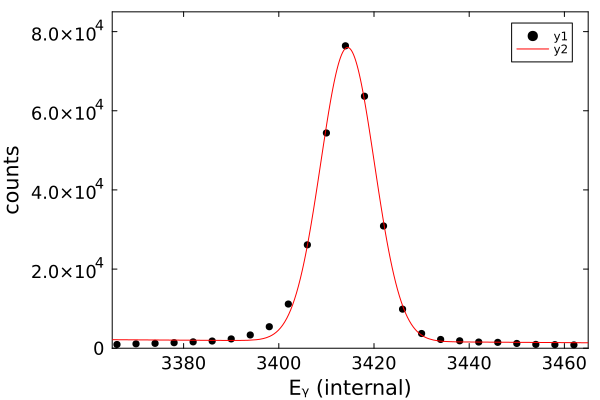

In [45]:
c03_x2low,c03_x2high = 3365,3465
c03_peak2_mean = 3415
c03_param2 = [100,0.05,2e5,c03_peak2_mean,5]

c03_p586,c03_s586,f=PhotopeakFit.gaussianfit(crystal3raw,c03_x2low,c03_x2high,c03_param2)

for (i,val) in enumerate(c03_p586)
    println("P$i = ",val,"($(c03_s586[i]))")
end

scatter(crystal3raw[:,1],crystal3raw[:,2],xlims=(c03_x2low,c03_x2high),ylims=(0,8.5e4))
plot!(e->f(e,c03_p586),c03_x2low,c03_x2high,lc=:red)

### Peak 4 [1.15e4,1.182e4]

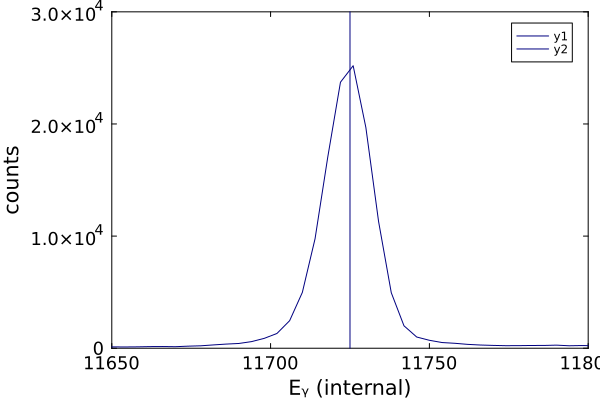

In [51]:
plot(crystal2raw[:,1],crystal2raw[:,2],xlims=(1.165e4,1.18e4),ylims=(0,3e4))
vline!([11725])

P1 = 3374.5723998423896(14622.513322364326)
P2 = -0.2564872745754691(1.2469451502604343)
P3 = 470783.6125107913(4783.677610770038)
P4 = 11724.486963590198(0.07608087010524703)
P5 = 7.5553362945030615(0.08021466617968816)


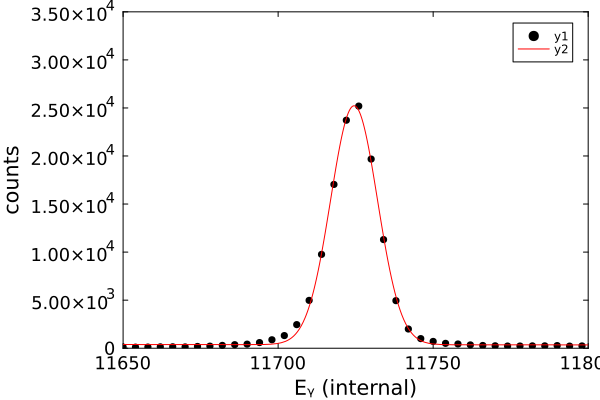

In [55]:
c03_x3low,c03_x3high = 1.165e4,1.18e4
c03_peak3_mean = 1.1725e4
c03_param3 = [100,0.05,2e5,c03_peak3_mean,5]

c03_p2013,c03_s2013,f=PhotopeakFit.gaussianfit(crystal3raw,c03_x3low,c03_x3high,c03_param3)

for (i,val) in enumerate(c03_p2013)
    println("P$i = ",val,"($(c03_s2013[i]))")
end

scatter(crystal3raw[:,1],crystal3raw[:,2],xlims=(c03_x3low,c03_x3high),ylims=(0,3.5e4))
plot!(e->f(e,c03_p2013),c03_x3low,c03_x3high,lc=:red)

## Energy Calibration

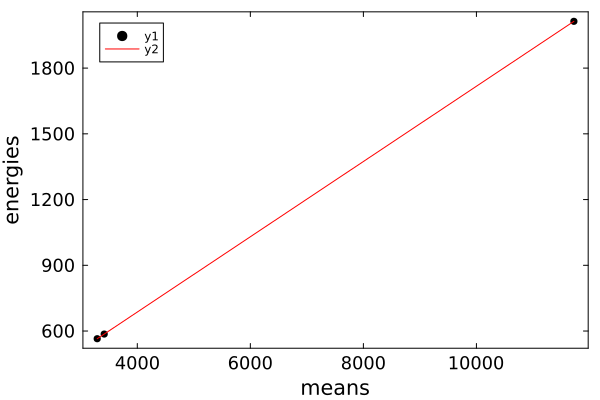

In [56]:
energies = [564.79,586.01,2013.45]; c03_means=[c03_p564[4],c03_p586[4],c03_p2013[4]]

scatter(means,energies,xlabel="means",ylabel="energies")

@. linearfit(e,p)=p[1]+p[2]*e

fitcrystal3=curve_fit(linearfit,c03_means,energies,[500,0.15])

scatter(c03_means,energies,xlabel="means",ylabel="energies")
plot!(e->linearfit(e,fitcrystal3.param),lc=:red)

### Residuals

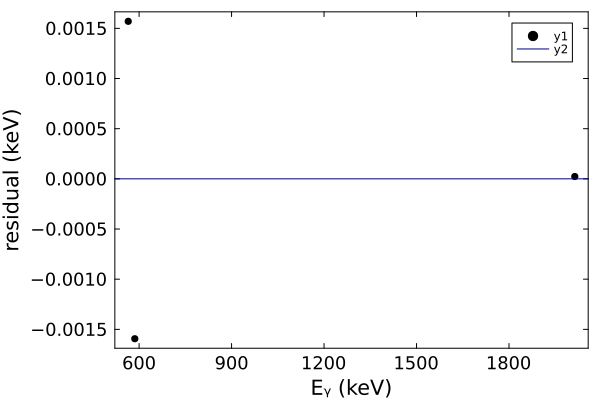

In [57]:
c03_residuals = energies .- ( fitcrystal3.param[1] .+ c03_means .* fitcrystal3.param[2] )

scatter(energies,c03_residuals,xlabel="Eᵧ (keV)",ylabel="residual (keV)")
hline!([0])

### Calibrated Histogram

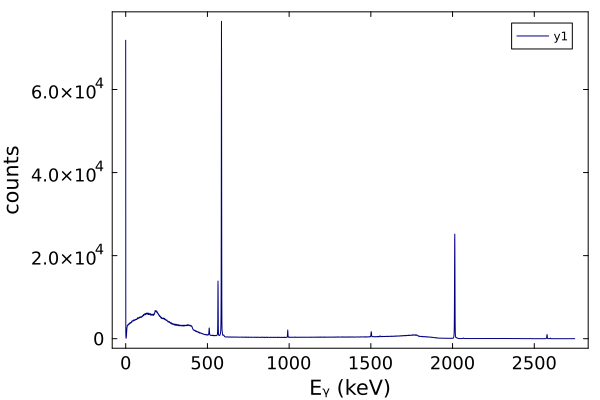

In [58]:
crystal3calibrated = [ fitcrystal3.param[1].+crystal3raw[:,1].*fitcrystal3.param[2] crystal3raw[:,2] ] 

plot(crystal3calibrated[:,1],crystal3calibrated[:,2],xlabel="Eᵧ (keV)")